In [19]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv

--2019-10-08 06:45:32--  https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261 [text/plain]
Saving to: ‘airmiles.csv’

airmiles.csv        100%[===================>]     261  --.-KB/s    in 0s      

2019-10-08 06:45:33 (24.2 MB/s) - ‘airmiles.csv’ saved [261/261]



In [6]:
!ls

airmiles.csv  day2.ipynb  Untitled1.ipynb


In [7]:
df = pd.read_csv("airmiles.csv")
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


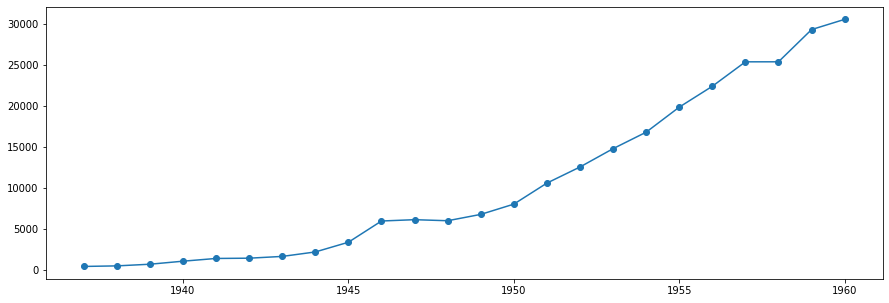

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(df.time, df.airmiles, 'o-');

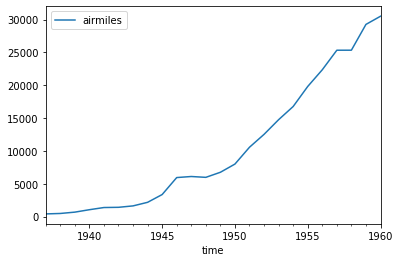

In [13]:
df = pd.read_csv("airmiles.csv", parse_dates=["time"], index_col="time")
df[['airmiles']].plot();

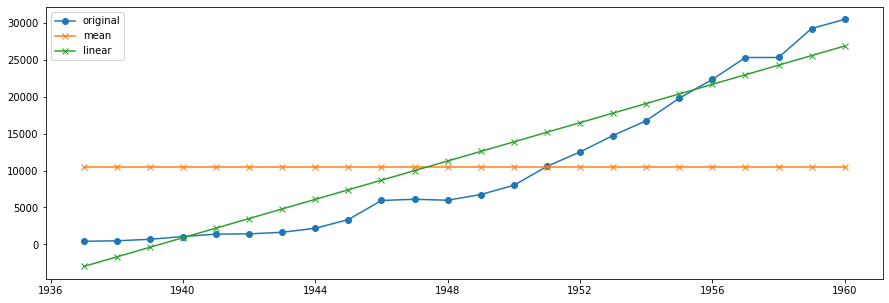

In [18]:
def linear_func(airmiles, k=None, b=0):
    mean_value = np.mean(airmiles)
    if k is None:
        return [mean_value] * len(airmiles)
    
    return [idx*k + b for idx,_ in enumerate(airmiles)]

plt.figure(figsize=(15, 5))
plt.plot(df.index, df.airmiles, 'o-', label='original');
plt.plot(df.index, linear_func(df.airmiles), 'x-', label='mean');
plt.plot(df.index, linear_func(df.airmiles, 1300, -3000), 'x-', label='linear');

plt.legend();

## Metryka sukcesu

In [21]:
print('mean', mae(df.airmiles, linear_func(df.airmiles)))
print('mean', mae(df.airmiles, linear_func(df.airmiles, 1300, -3000)))

mean 8499.305555555557
mean 2935.0833333333335


In [26]:
best_k = 1300
best_b = -3000
best_mae = mae(df.airmiles, linear_func(df.airmiles, best_k, -best_b))

for k in range(1000, 1400, 50):
    for b in (-4000, -2000, 50):
        actual = mae(df.airmiles, linear_func(df.airmiles, k, b))
        if actual < best_mae:
            best_mae = actual
            best_k = k
            best_b = b
            
print("Best mea={} for k={} and b={}".format(best_mae, best_k, best_b))

Best mea=2714.5833333333335 for k=1250 and b=-4000
